# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Data Loading

In [ ]:
data = pd.read_csv('/content/Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Dataset tersebut adalah data yang berisi informasi tentang parameter untuk memprediksi jenis tanaman yang cocok ditanam dilahan pertanian, yang mana memililiki jumlah data 2200 baris dan 8 kolom. Berdasarkan informasi dari Kaggle, variabel-variabel pada dataset adalah sebagai berikut:

* N : Merepresentasikan rasio kandungan Nitrogen dalam tanah
* P : Merepresentasikan rasio kandungan Fosfor dalam tanah
* K : Merepresentasikan rasio kandungan Kalium dalam tanah
* temperature : Merepresentasikan suhu dalam derajat Celcius
* humidity : Merepresentasikan kelembaban relatif dalam %
* ph : Merepresentasikan nilai tanah
* rainfall : Merepresentasikan curah hujan dalam mm


# Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
null = data.isnull().sum()
print(null)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
duplicate = data.duplicated().sum()
print(duplicate)

0


Pada dataset untuk tipe datanya sudah sesuai, tidak memiliki missing value, dan tidak memiliki data yang duplikat.

In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
N = (data.N == 0).sum()
print("Jumlah nilai 0 pada kolom N :", N)

Jumlah nilai 0 pada kolom N : 27


In [ ]:
data = data[data['N'] != 0]
clean_N = (data.N == 0).sum()
print("Jumlah nilai 0 pada kolom N :", clean_N)

Jumlah nilai 0 pada kolom N : 0


             jumlah sampel  persentase
label                                 
rice                   100         4.6
maize                  100         4.6
chickpea               100         4.6
watermelon             100         4.6
banana                 100         4.6
blackgram              100         4.6
cotton                 100         4.6
jute                   100         4.6
papaya                 100         4.6
coffee                 100         4.6
muskmelon              100         4.6
mungbean                99         4.6
pigeonpeas              99         4.6
mothbeans               99         4.6
grapes                  99         4.6
kidneybeans             98         4.5
pomegranate             97         4.5
mango                   97         4.5
apple                   97         4.5
lentil                  96         4.4
orange                  96         4.4
coconut                 96         4.4


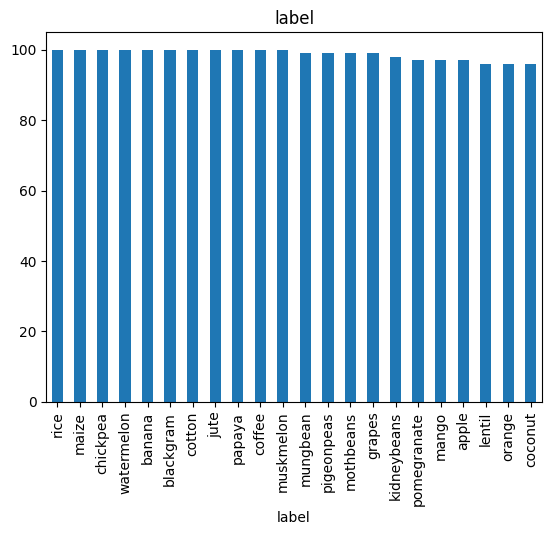

In [ ]:
count = data['label'].value_counts()
percent = 100*data['label'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title='label');

 Diketahui, pada variabel N terdapat nilai minimum 0, yang mana kandungan Nitrogen dalam tanah tidak mungkin bernilai 0. kemudian, saat diperiksa memiliki nilai 0 yang berjumlah 27, yang mana perlu dihapus pada data tersebut.

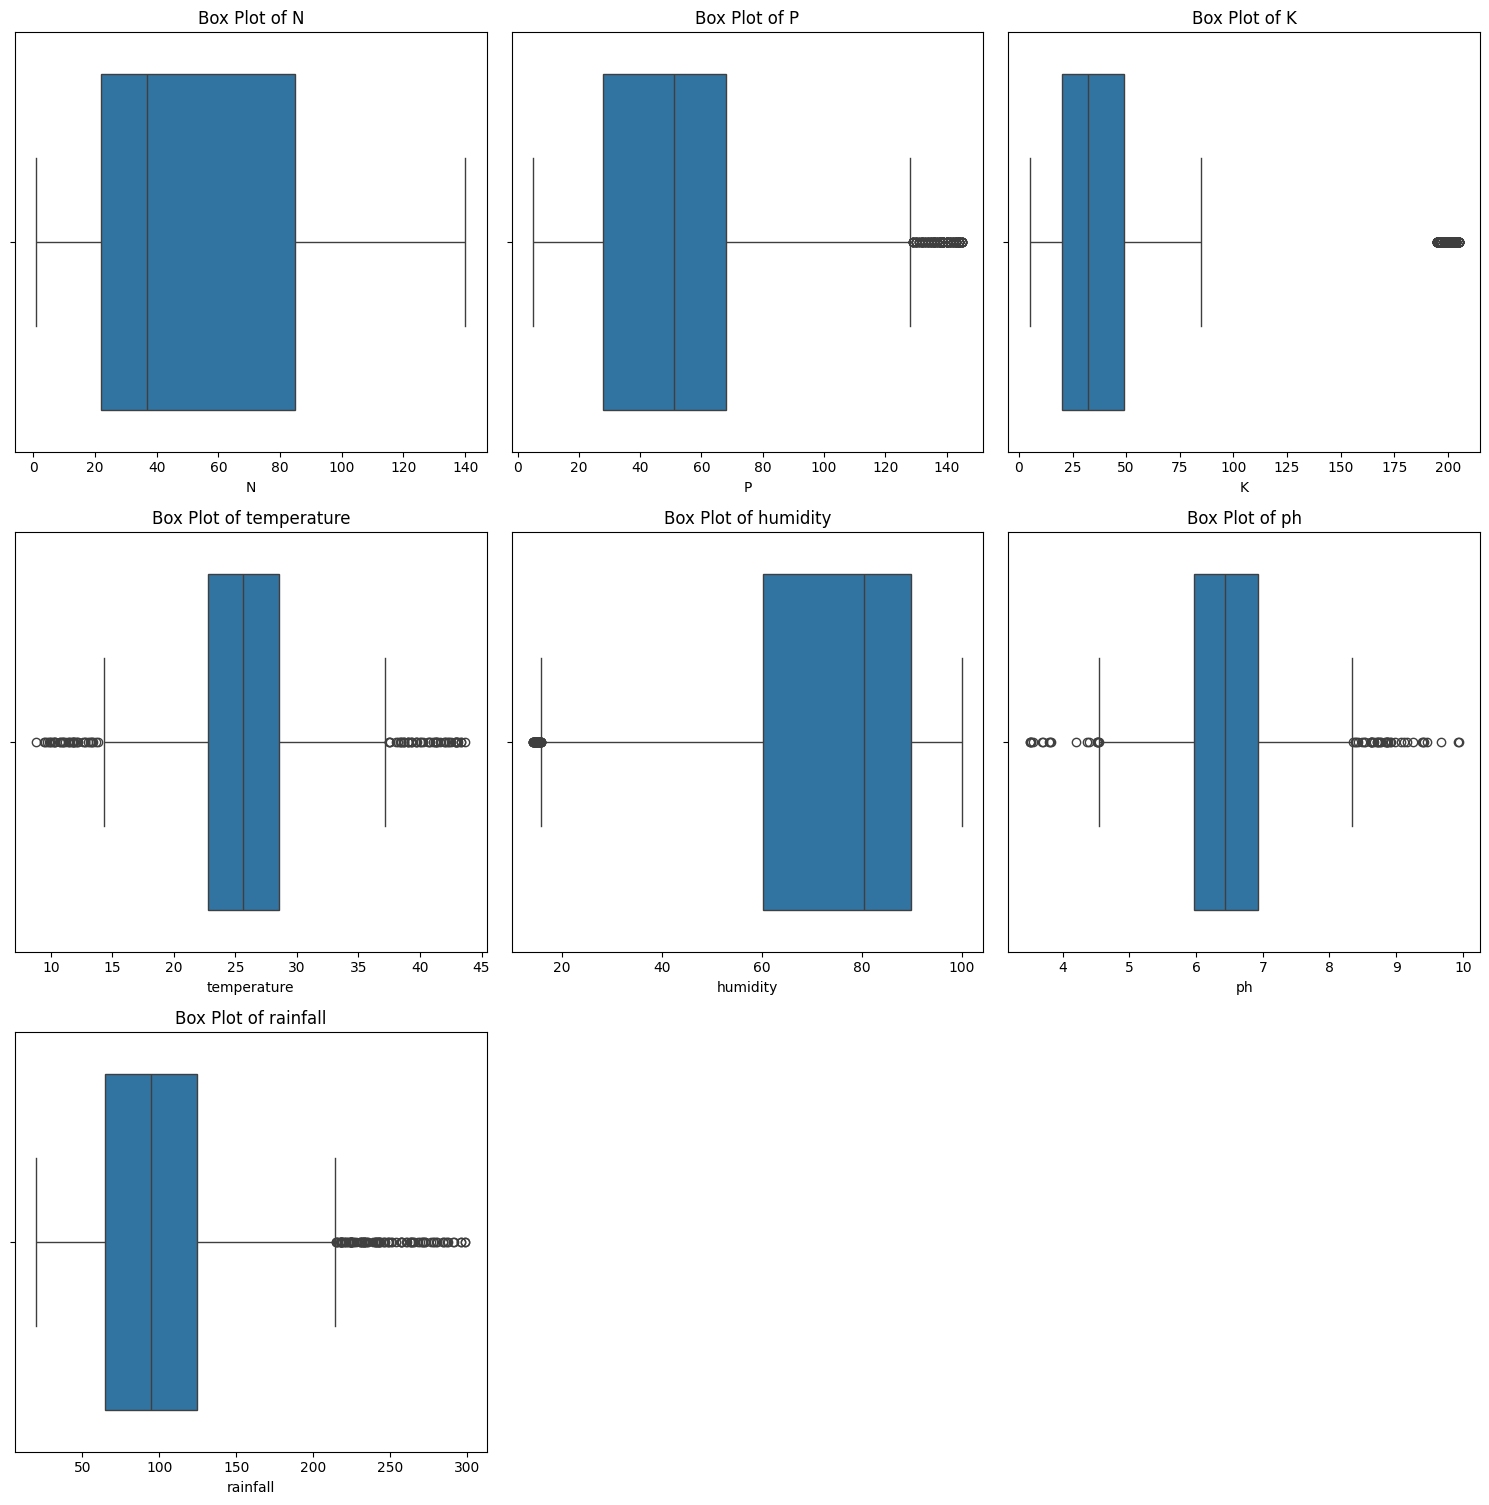

In [ ]:
num_features = data.select_dtypes(include='number')

num_cols = 3
num_rows = (len(num_features) + num_cols - 1)

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(num_features):
  plt.subplot(num_rows, num_cols, i + 1)
  sns.boxplot(x=data[feature])
  plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

Pada kolom numeric pada setiap variabel memiliki outlier yang cukup banyak, namun hanya variabel N yang tidak memiliki outlier.

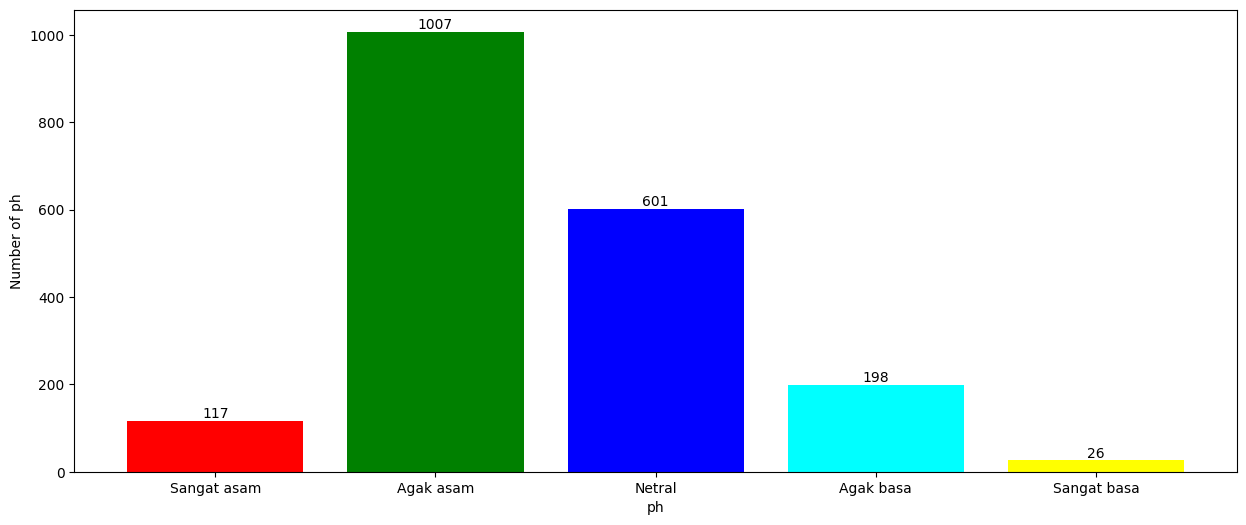

In [ ]:
ph_sa = data.ph[data.ph <= 5.5]
ph_aa = data.ph[(data.ph >= 5.6) & (data.ph <= 6.5)]
ph_n = data.ph[(data.ph >= 6.6) & (data.ph <= 7.3)]
ph_ab = data.ph[(data.ph >= 7.4) & (data.ph <= 8.5)]
ph_sb = data.ph[data.ph >= 8.7]

x = ["Sangat asam", "Agak asam", "Netral", "Agak basa", "Sangat basa"]
y = [len(ph_sa.values), len(ph_aa.values), len(ph_n.values), len(ph_ab.values), len(ph_sb.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Distribusi ph")
plt.xlabel("ph")
plt.ylabel("Number of ph")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Melakukan binning untuk variabel ph untuk mengelompok berdasarkan kadar ph menjadi 5 kategori, yaitu Sangat asam, Agak asam, Netral, Agak basa, Sangat basa. Yang mana diketahui untuk pada dataset tersebut, banyak tanaman dikadar ph agak asam dan netral, diketahui juga bahwa sedikit menaman tanaman dikadar sangat basa.

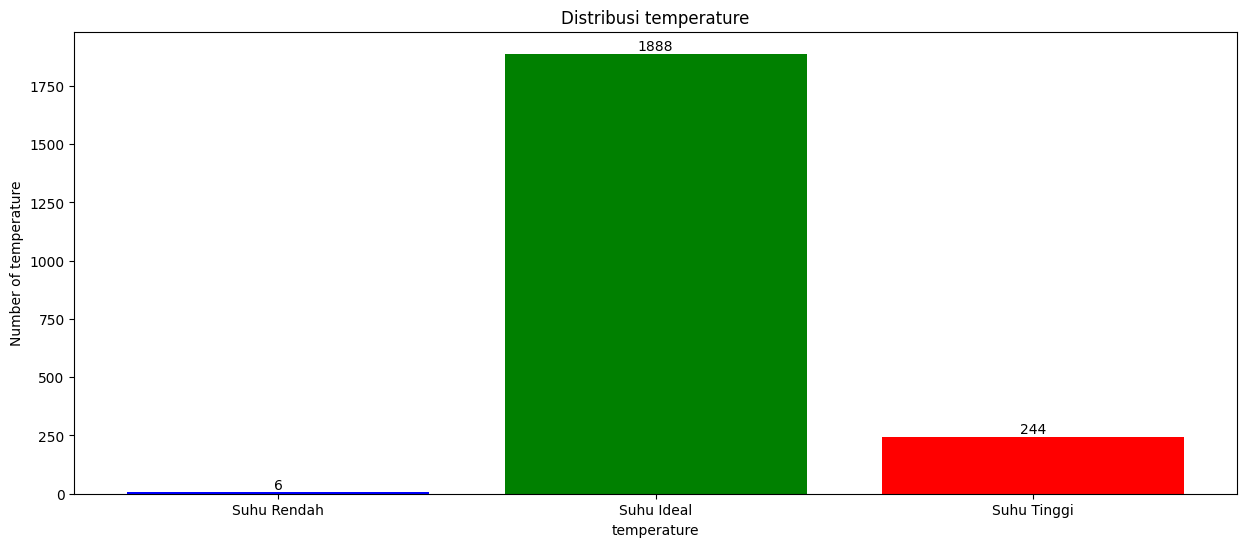

In [ ]:
th_cold = data.temperature[data.temperature <= 10]
th_netral = data.temperature[(data.temperature >= 11) & (data.temperature <= 30)]
th_hot = data.temperature[data.temperature >= 31]

x = ["Suhu Rendah", "Suhu Ideal", "Suhu Tinggi"]
y = [len(th_cold.values), len(th_netral.values), len(th_hot.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['blue', 'green', 'red'])
plt.title("Distribusi temperature")
plt.xlabel("temperature")
plt.ylabel("Number of temperature")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

Pada distribsui suhu pada dataset dengan melakukan binning menjadi 3 kategori, yaitu Suhu Rendah, Suhu Ideal, Suhu Tinggi. Yang mana diketahui bahwa tanaman banyak ditanaman pada suhu ideal.

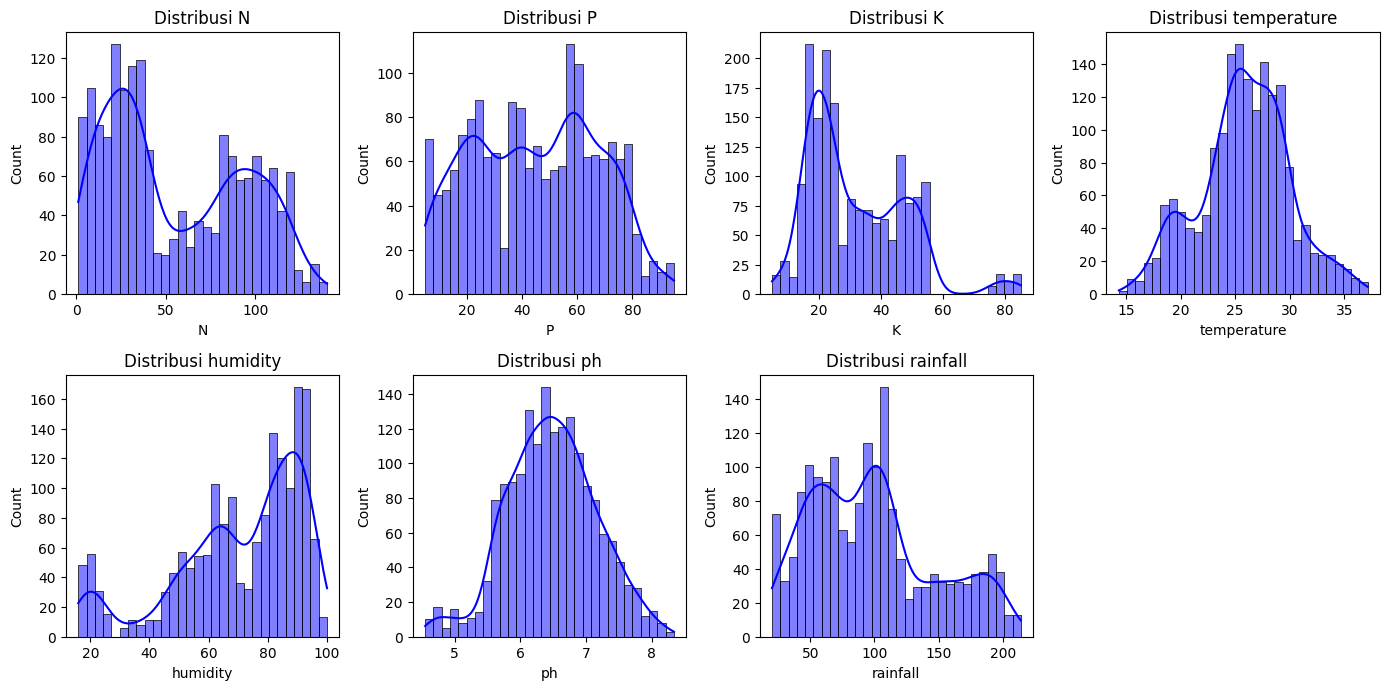

In [ ]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(data[column], bins=30, kde=True, color='blue')
  plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

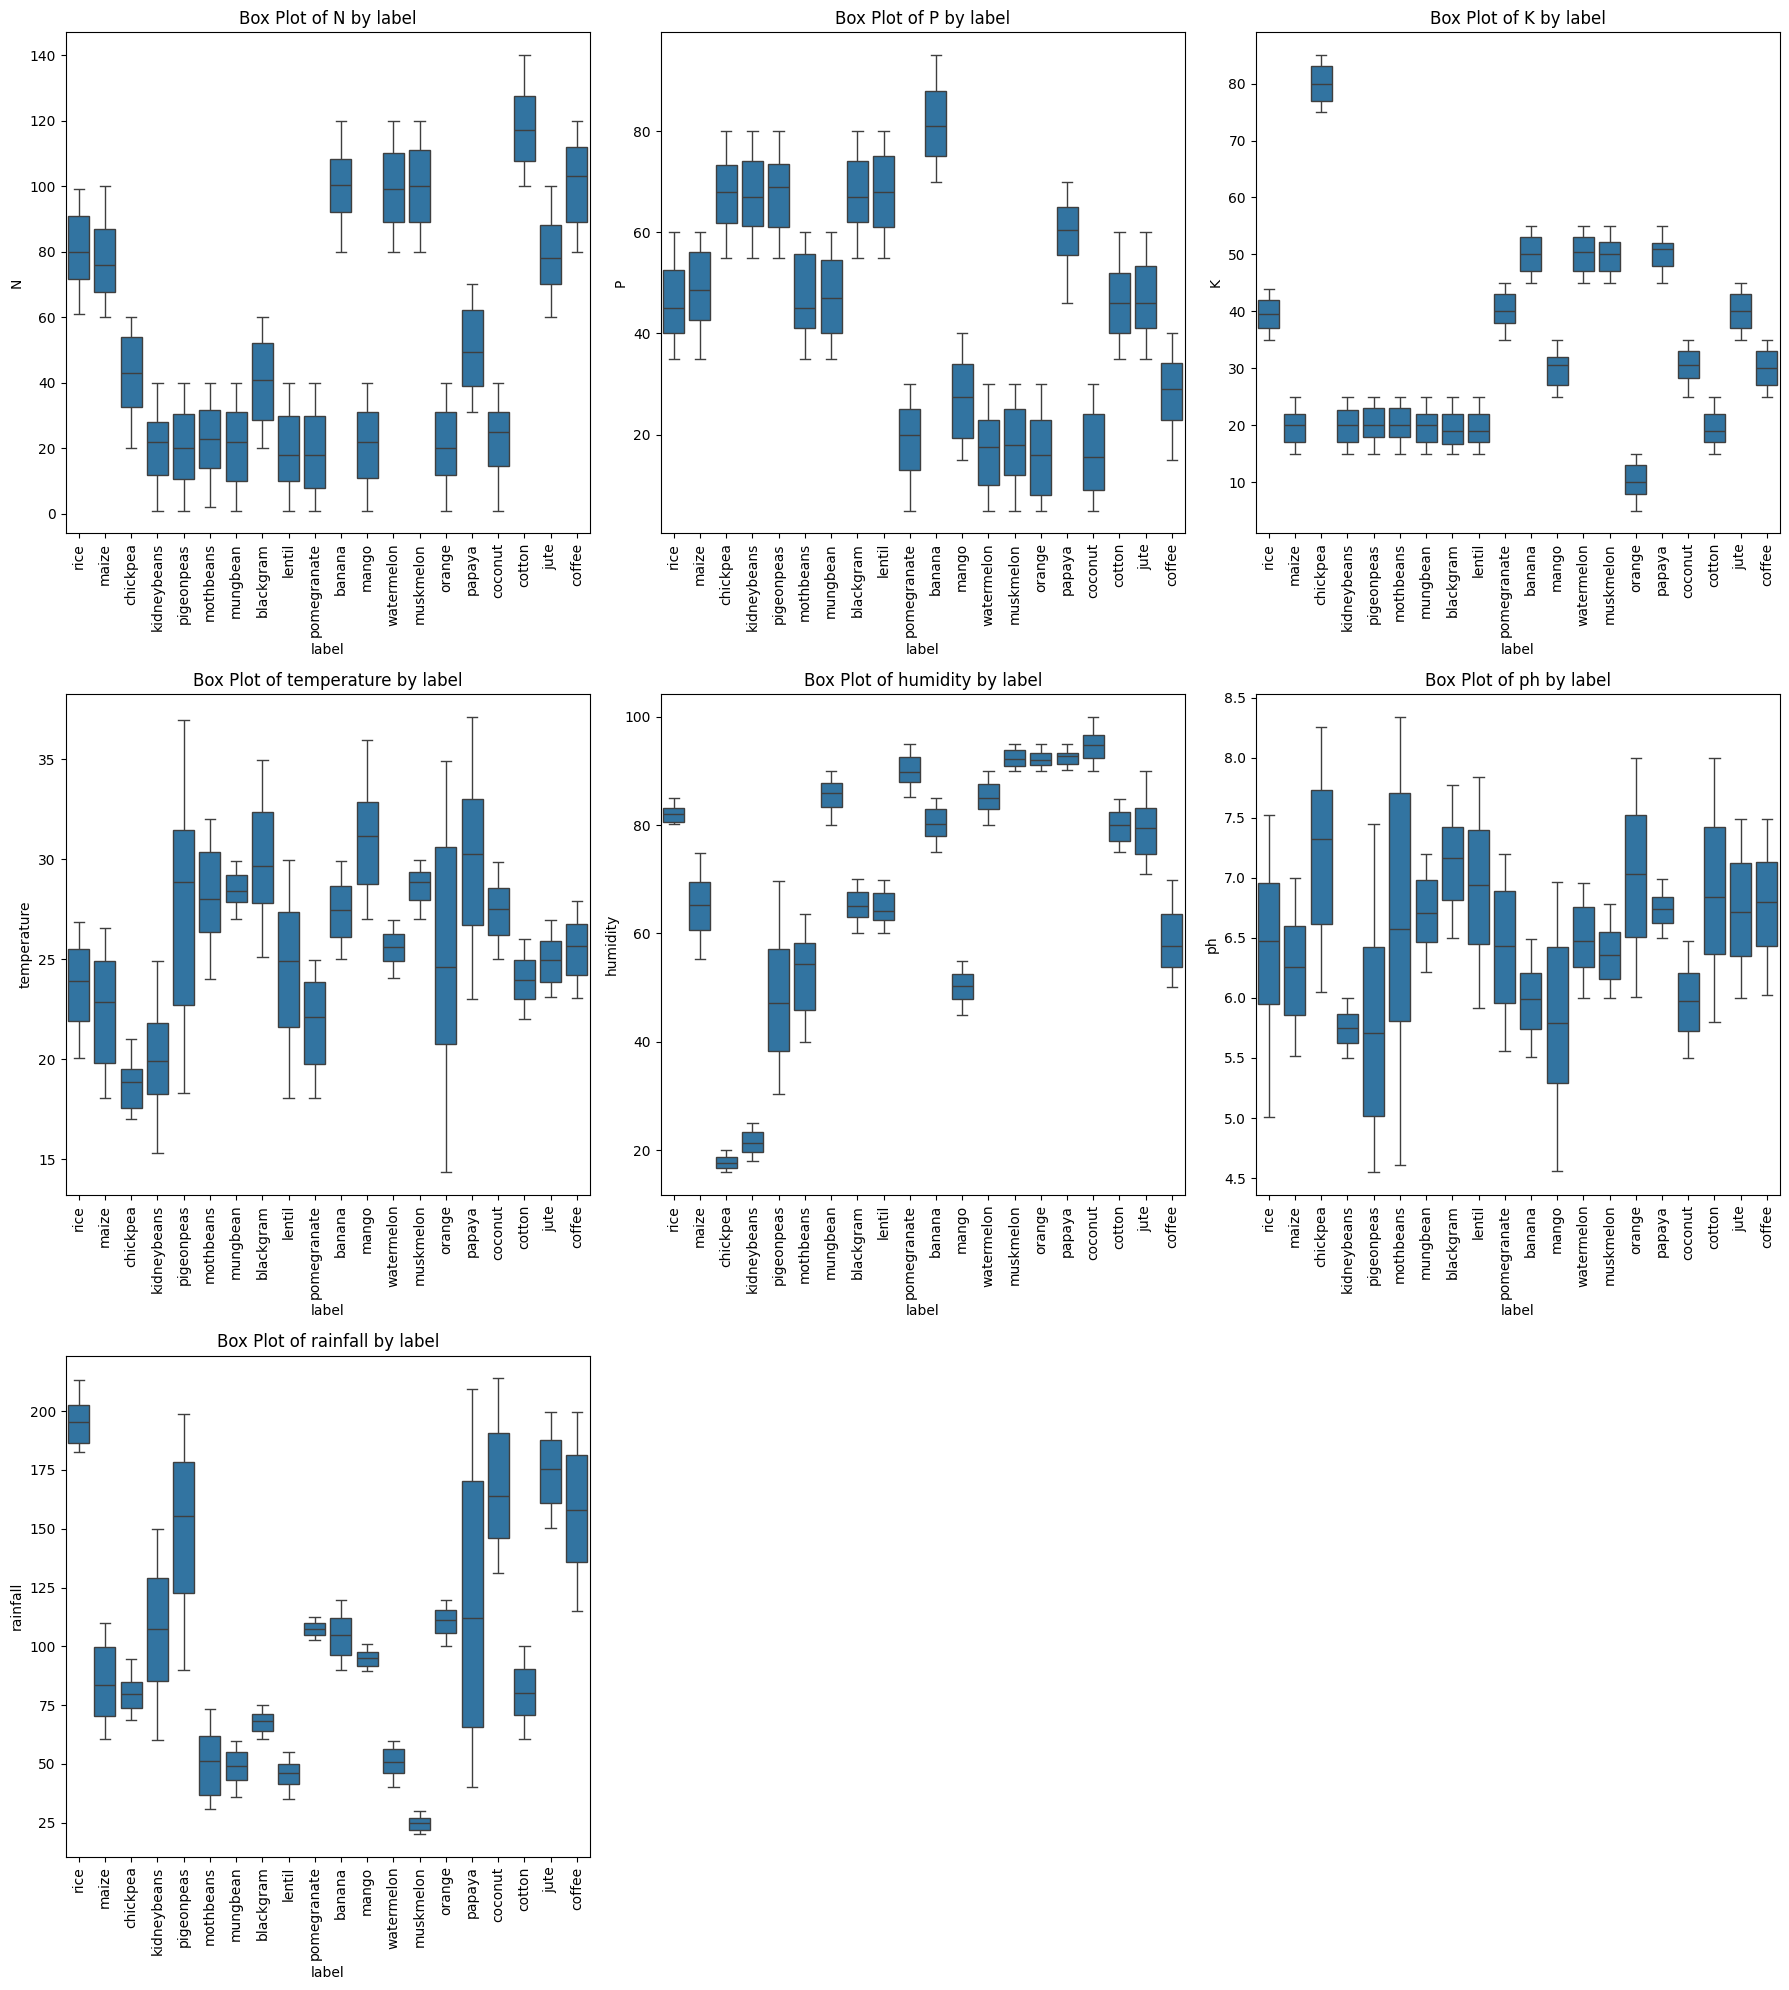

In [ ]:
plt.figure(figsize=(18, 20))

for i, column in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data, x='label', y=column)
    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {column} by label')

plt.tight_layout()
plt.show()

# Data Preperation

In [ ]:
numeric_cols = data.select_dtypes(include='number').columns

Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filter_outliers = ~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

data = data[filter_outliers]

data.shape

(1740, 8)

pada tahap ini menghapus outlier pada kolom numeric, yang mana jumlah dataset setelah dibersihkan menjadi 1740 baris.

             jumlah sampel  persentase
label                                 
maize                  100         5.7
muskmelon              100         5.7
banana                 100         5.7
blackgram              100         5.7
cotton                 100         5.7
jute                   100         5.7
watermelon             100         5.7
coffee                 100         5.7
pigeonpeas              99         5.7
mungbean                99         5.7
kidneybeans             98         5.6
pomegranate             97         5.6
lentil                  96         5.5
mango                   94         5.4
coconut                 82         4.7
orange                  79         4.5
mothbeans               58         3.3
papaya                  54         3.1
chickpea                52         3.0
rice                    32         1.8


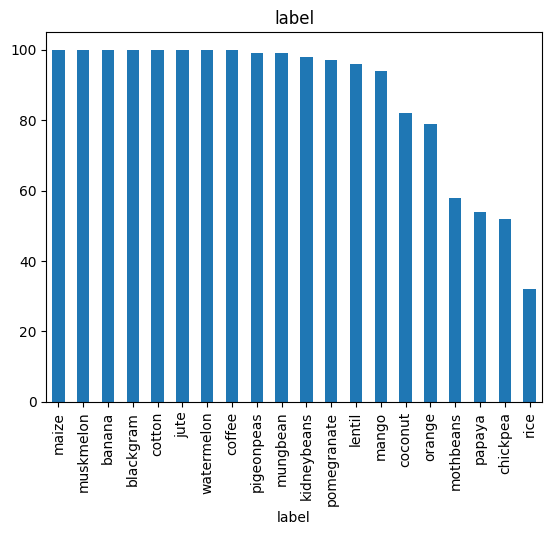

In [ ]:
count = data['label'].value_counts()
percent = 100*data['label'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title='label');

Setelah menghapus outlier dan diperiksa ulang untuk jumlah sampel nya, diketahui bahwa kelas rice memiliki banyak outlier yang membuat kelas memjadi tidak seimbang, hal ini dapat membuat model menjadi bias dan mengalami overfitting.

In [ ]:
X = data.drop('label', axis=1)
y = data['label']

le = LabelEncoder()
y = le.fit_transform(y)


sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pada tahap ini membuat variabel X untuk menyimpan variabel untuk diganakan sebagai parameter untuk memprediksi dan variabel y merupakan label yang ingin diprediksi. Selanjutnya, melakukan label encoder pada variabel y untuk mengubah data categorikal pada data tersebut ke format numeric. Setelah itu, melakukan standarisasi pada variabel X, yang mana nilai pada data tersebut diubah sehingga memiliki rata-rata 0 dan deviasi standar 1, yang membantu meningkatkan performa model machine learning dengan memastikan bahwa semua fitur berkontribusi secara seimbang. Kemudian yang terakhir membagi data menjadi data latih (train) dan data uji (test), yang mana data tersebut dibagi menjadi 80% untuk latihan dan 20% untuk pengujian.

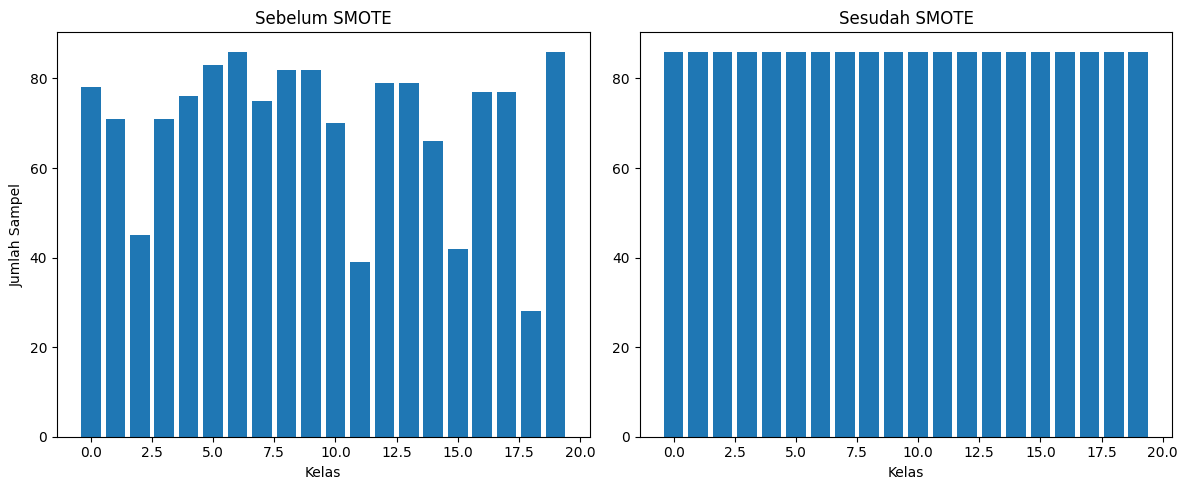

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

before = pd.Series(y_train).value_counts()
after = pd.Series(y_train_resampled).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(before.index, before.values)
ax1.set_title('Sebelum SMOTE')
ax1.set_xlabel('Kelas')
ax1.set_ylabel('Jumlah Sampel')

ax2.bar(after.index, after.values)
ax2.set_title('Sesudah SMOTE')
ax2.set_xlabel('Kelas')

plt.tight_layout()
plt.show()

Pada tahap ini melakukan SMOTE untuk menangani ketidakseimbang kelas, Karena pada saat cleaning data, pada dataset diketahui untuk kelas rice jumlah datanya menjadi sangat berkurang. Hal ini dapat mengakibatkan model menjadi bias dan overfitting pada kelas mayoritas.

# Modeling

In [ ]:
models = pd.DataFrame(index=['train_accuracy', 'test_accuracy'],
                      columns=['RandomForest', 'Boosting', 'SVC', 'KNN'])

In [ ]:
RF_model = RandomForestClassifier()
models.loc['train_accuracy','RandomForest'] = RF_model.fit(X_train_resampled, y_train_resampled)

Random Forest adalah algoritma ensemble yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi risiko overfitting. Kelebihannya termasuk kemampuannya untuk menangani data yang hilang dan memberikan estimasi pentingnya fitur yang baik. Model ini juga robust terhadap outlier dan dapat menangani variabel kategorikal dan numerik secara efisien.

In [ ]:
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
models.loc['train_accuracy','Boosting'] = boosting.fit(X_train_resampled, y_train_resampled)

Gradient Boosting adalah teknik yang sangat efektif untuk klasifikasi, dengan keunggulan menghasilkan model yang lebih akurat, terutama pada dataset yang lebih kecil. Pada model ini menggunakan 100 pohon keputusan, model dapat menangkap pola dalam data secara efektif tanpa overfitting.

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
models.loc['train_accuracy','SVC'] = svm_model.fit(X_train_resampled, y_train_resampled)

SVC sangat efektif dalam menangani data yang memiliki margin klasifikasi yang jelas antara kelas-kelas. Kelebihannya termasuk kemampuan untuk menggunakan berbagai kernel, yang memungkinkan model menangkap pola non-linear dalam data.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
models.loc['train_accuracy','KNN'] = knn_model.fit(X_train_resampled, y_train_resampled)

KNN adalah algoritma yang sederhana dan mudah dipahami, serta tidak memerlukan pelatihan eksplisit. Kelebihannya termasuk kemampuannya untuk beradaptasi dengan data baru dan tidak terpengaruh oleh asumsi distribusi data.

# Evaluasi Model

In [ ]:
accuracy = pd.DataFrame(columns=['train', 'test'], index=['RandomForest', 'Boosting', 'SVC', 'KNN'])

model_dict = {'RandomForest' : RF_model, 'Boosting' : boosting, 'SVC' : svm_model, 'KNN': knn_model}

for name, model in model_dict.items():
    accuracy.loc[name, 'train'] = accuracy_score(y_true=y_train_resampled, y_pred=model.predict(X_train_resampled))
    accuracy.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

accuracy

,train,test
RandomForest,1.0,0.991379
Boosting,1.0,0.974138
SVC,0.986628,0.985632
KNN,0.988372,0.982759


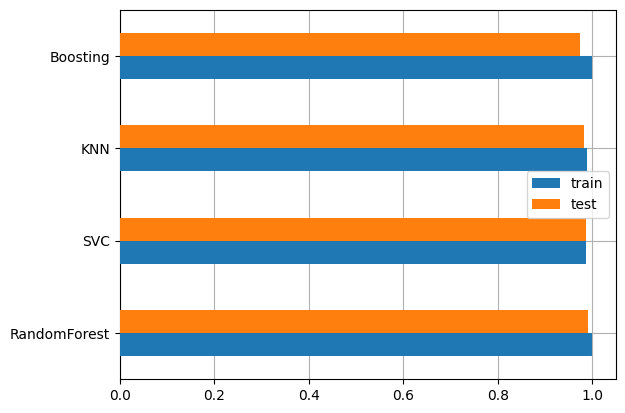

In [ ]:
fig, ax = plt.subplots()
accuracy.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Setelah melihat accuracy, diketahui bahwa semua model memliki accuracy yang tinggi untuk data latih data test. Namun pada RandomForest dan Boosting memiliki skor (1.0) di data train, yang mungkin mengindikasikan overfitting.

In [ ]:
prediksi = X_test[:5].copy()
true_label_numeric = y_test[:5].tolist()

true_label_string = le.inverse_transform(true_label_numeric)

pred_dict = {'y_true': true_label_string}

for name, model in model_dict.items():
    pred_numeric = model.predict(prediksi)
    pred_string = le.inverse_transform(pred_numeric)
    pred_dict['prediksi_' + name] = pred_string

pred_df = pd.DataFrame(pred_dict)

print(pred_df)

     y_true prediksi_RandomForest prediksi_Boosting prediksi_SVC prediksi_KNN
0  mungbean              mungbean          mungbean     mungbean     mungbean
1    cotton                cotton            cotton       cotton       cotton
2     mango                 mango             mango        mango        mango
3     mango                 mango             mango        mango        mango
4    lentil                lentil            lentil       lentil       lentil


Dari hasil prediksi tersebut diketahui bahwa, semua model dapat meprediksi dengan benar dengan semua data yang diprediksi. yang mana semua model cocok untuk kalsifikasi pada dataset ini.

In [ ]:


y_pred_random_forest = model_dict['RandomForest'].predict(X_test)
y_pred_boosting = model_dict['Boosting'].predict(X_test)
y_pred_svc = model_dict['SVC'].predict(X_test)
y_pred_knn = model_dict['KNN'].predict(X_test)

report_rf = classification_report(y_test, y_pred_random_forest, target_names=le.classes_)
report_boosting = classification_report(y_test, y_pred_boosting, target_names=le.classes_)
report_svc = classification_report(y_test, y_pred_svc, target_names=le.classes_)
report_knn = classification_report(y_test, y_pred_knn, target_names=le.classes_)

print("Random Forest Classification Report:\n", report_rf)
print("Boosting Classification Report:\n", report_boosting)
print("SVC Classification Report:\n", report_svc)
print("KNN Classification Report:\n", report_knn)

Random Forest Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00         7
     coconut       1.00      1.00      1.00        11
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        17
        jute       0.88      1.00      0.93        14
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.93      1.00      0.97        14
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        24
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        13
      papaya       1.00      1.00      1.00        12
  pigeonpeas       1.00      1.00      1.00

Dari keempat model yang dievaluasi, Random Forest terbukti sebagai model terbaik dengan akurasi tertinggi (99%) dan performa paling konsisten. Model ini menghasilkan precision dan recall sempurna (1.00) untuk hampir semua kelas tanaman, kecuali pada kelas minoritas seperti rice yang memiliki recall rendah (0.50) karena jumlah sampelnya sangat sedikit. SVC juga mencapai akurasi 99%, tetapi mengalami masalah precision pada rice (0.60) dan jute (0.86). Boosting menunjukkan potensi overfitting dengan performa tidak stabil di beberapa kelas seperti mothbeans. Sementara itu, KNN menjadi model terlemah dengan F1-score terendah untuk rice (0.57). Dengan demikian, Random Forest merupakan pilihan optimal untuk klasifikasi tanaman ini.